In [7]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt


# Which is the best neighborhood to drive in?



## Speed Bumps and Bridges
Since we want to have fun while driving, we don't really care about the quality of our car afterwards. That's why, we want to **maximize** the number of **speed bumps** and **bridges**. We'll start by reading our data in. 

In [ ]:

bridges = pd.read_csv("assets/bridges.csv", sep=",", header=0)
speed_humps = pd.read_csv("assets/speed_humps.csv", sep=",", header=0)
print("Bridges:\n")
bridges.head(10)
print("*" * 20)
print("\nSpeed Bumps")
speed_humps.head(10)

Bridges:

********************

Speed Bumps


,_id,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,34,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,67,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,68,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,69,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355
5,100,25169591,10,4224.0,Saline St,4673,Asphalt,Squirrel Hill South,5,15,42003141400,3,15,4,2-15,40.422239,-79.926208
6,101,2056880845,11,2146.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.391643,-79.999307
7,102,1735565853,12,2082.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.392425,-79.999259
8,103,857069875,13,2013.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.393264,-79.999401
9,104,1822275525,14,1937.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.394180,-79.999611


Now, let's see which neighborhoods have the most speed bumps. We can get that as a numbered series or a nice graph. 

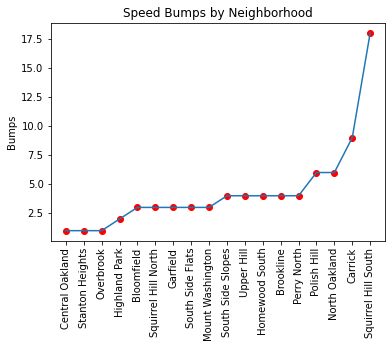

In [ ]:
res = speed_humps.groupby('neighborhood')['_id'].count().sort_values(ascending=True)
# Create a bar plot
plotted = res.plot(kind='line', title="Speed Bumps by Neighborhood", xlabel="", ylabel="Bumps")
# Get the x-axis tick labels
x_labels = res.index
plotted.set_xticks(range(len(x_labels)))
plotted.set_xticklabels(x_labels, rotation=90)
# add dots to the specified values
indices = res.index[:]  # Start from the third element
values = res[indices]
plotted.scatter(indices, values, color='red', label='Highlighted Points')


Now that we know that Carrick and Squirrel Hill went *crazy* on their speed bump budget, we can convert this information into a map to visualize it even better. 

In [ ]:
# read in shape files
neighborhoods = gpd.read_file('assets/pittsburghpaneighborhoods-/Neighborhoods_.shp')

geometry = [Point(xy) for xy in zip(speed_humps['longitude'], speed_humps['latitude'])]
gdf = gpd.GeoDataFrame(speed_humps, geometry=geometry)

# plot neighborhoods
layer = neighborhoods.plot(color='#96ADC8', edgecolor='black')

# plot the bridges over top
gdf.plot(ax=layer, color='#F49D37', edgecolor='black')

plt.title('Pittsburgh Speed Bump')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(14.625, 0.5, 'Latitude')

Now, let's switch gears and talk about bridges. Who doesn't love Pittsburgh bridges? We can visualize where the City of Bridges gets its name by this map. 

Neighborhoods CRS: epsg:4326
Bridges CRS: epsg:3857


Text(45.90940929483406, 0.5, 'Latitude')

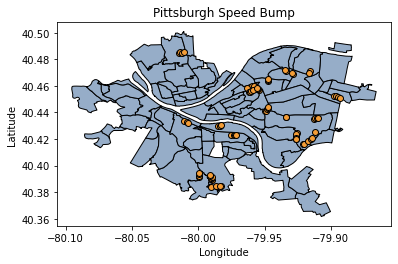

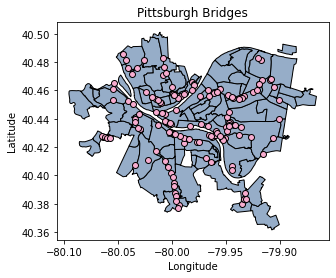

In [ ]:
# read in shape files
neighborhoods = gpd.read_file('assets/pittsburghpaneighborhoods-/Neighborhoods_.shp')
bridges_shaped = gpd.read_file('assets/Pittsburgh_Bridges-shp/PGHBridges.shp')

# We want to make sure the scales are the same
print("Neighborhoods CRS:", neighborhoods.crs)
print("Bridges CRS:", bridges_shaped.crs)
bridges_shaped = bridges_shaped.to_crs(neighborhoods.crs)

# plot neighborhoods
layer = neighborhoods.plot(color='#96ADC8', edgecolor='black')

# plot the bridges over top
bridges_shaped.plot(ax=layer, color='#F7ACCF', edgecolor='black')

plt.title('Pittsburgh Bridges')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Cool! So now, let's combine the maps and find what the best neighborhood is. 

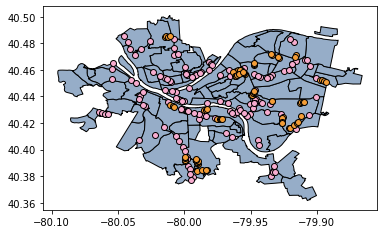

In [ ]:
layer = neighborhoods.plot(color='#96ADC8', edgecolor='black')

# plot the bridges over top
bridges_shaped.plot(ax=layer, color='#F7ACCF', edgecolor='black')
gdf.plot(ax=layer, color='#F49D37', edgecolor='black')

So, we see a bunch of bridges and a bunch of speed bumps in **Squirrel Hill South**. 

## Speed
Now we want to make sure we're riding in a neighborhood that isn't unfamiliar with speed. Therefore, let's use a dataset that we can find speed information from. 

In [9]:
speed = pd.read_csv("assets/speed.csv", sep=",", header=0)

Now with this, let's see a graph of the neighborhoods' max speed recorded.

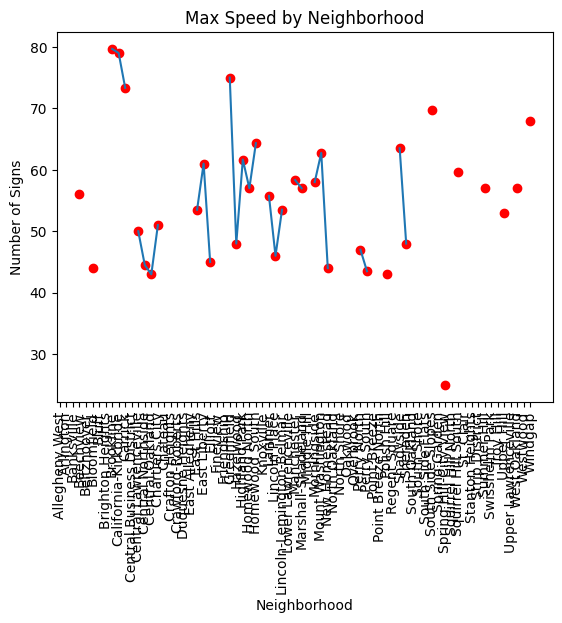

In [13]:
average_speed = speed.groupby('neighborhood')['max_speed'].mean()


graph = average_speed.plot(kind='line', title="Max Speed by Neighborhood", xlabel="Neighborhood", ylabel="Number of Signs")
x_labels = average_speed.index
graph.set_xticks(range(len(x_labels)))
graph.set_xticklabels(x_labels, rotation=90)

# add dots to the specified values
indices = average_speed.index[:]
values = average_speed[indices]
graph.scatter(indices, values, color='red')

Okay, so that doesn't tell us much. Plus the graph looks weird and we can't read the data. Let's filter out null values.

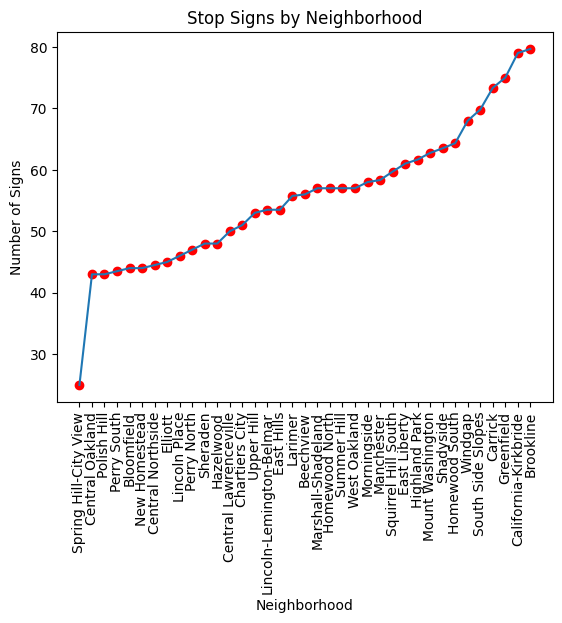

In [14]:
average_speed = speed[(speed['max_speed'] > 0)].groupby('neighborhood')['max_speed'].mean().sort_values(ascending=True)


graph = average_speed.plot(kind='line', title="Stop Signs by Neighborhood", xlabel="Neighborhood", ylabel="Number of Signs")
x_labels = average_speed.index
graph.set_xticks(range(len(x_labels)))
graph.set_xticklabels(x_labels, rotation=90)

# add dots to the specified values
indices = average_speed.index[:]
values = average_speed[indices]
graph.scatter(indices, values, color='red')

Sweet! We're getting somewhere. Let's be a little safe and keep only neighborhoods that are, on average, between 40 and 50mph. 

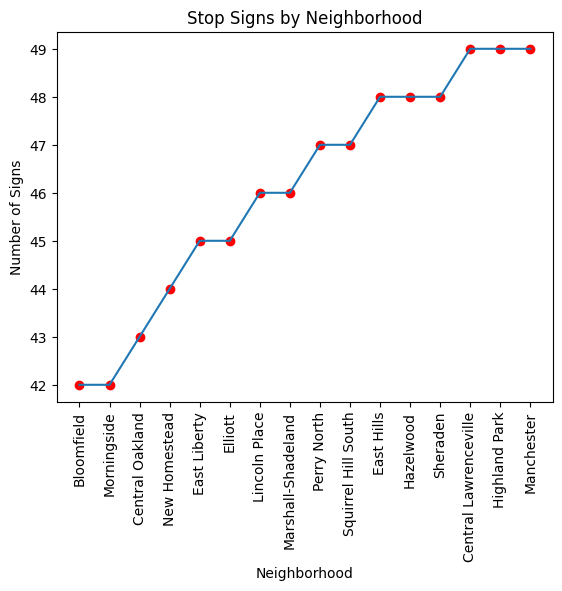

In [15]:
average_speed = speed[(speed['max_speed'] > 40) & (speed['max_speed'] < 50)].groupby('neighborhood')['max_speed'].mean().sort_values(ascending=True)


graph = average_speed.plot(kind='line', title="Stop Signs by Neighborhood", xlabel="Neighborhood", ylabel="Number of Signs")
x_labels = average_speed.index
graph.set_xticks(range(len(x_labels)))
graph.set_xticklabels(x_labels, rotation=90)

# add dots to the specified values
indices = average_speed.index[:]
values = average_speed[indices]
graph.scatter(indices, values, color='red')

From this, we can conclude that in terms of speed, **Central Lawrenceville**, **Highland Park** or **Manchester** would be the most fun! We'll pick **Manchester** for this metric. 

## Street Signs
Driving can get boring if you are just driving in a straight line with no obstacles. To have fun, we want the most action while we drive so we need to find where there's the **most** street signs as well as most **unique** street signs. Let's read the data in and print it to see what we have.

In [ ]:
signs = pd.read_csv("assets/street_signs.csv", sep=",", header=0)
print(signs.head(10))

Let's filter down to some more common street signs. We'll also look at only 18 neighborhoods instead of 92.

In [ ]:
# choose specific signs and neighborhoods
specific_signs = ['Stop', 'Yield', 'No Parking Anytime', 'Do Not Enter', 'One Way', 'Pedestrian', 'Traffic Signal Ahead', 'Bike Lane']
specific_neighborhoods = ['Central Oakland', 'Stanton Heights', 'Overbrook', 'Highland Park', 'Bloomfield', 'Squirrel Hill North', 'Garfield', 'South Side Flats', 'Mount Washington', 'South Side Slopes', 'Upper Hill', 'Homewood South', 'Brookline', 'Perry North', 'Polish Hill', 'North Oakland', 'Carrick', 'Squirrel Hill South']

# filter down the data to only include the specific signs and neighborhoods
filtered_neighborhood = signs[signs['neighborhood'].isin(specific_neighborhoods)]
filtered_signs = filtered_neighborhood[filtered_neighborhood['description'].isin(specific_signs)]

Great! Now, lets take a look at which of these neighborhoods has the most street signs in general.

In [ ]:
res = filtered_signs.groupby('neighborhood').size().sort_values(ascending=True)

# plot the data
graph = res.plot(kind='line', title="Street Signs by Neighborhood", xlabel="Neighborhood", ylabel="Number of Signs")

x_labels = res.index
graph.set_xticks(range(len(x_labels)))
graph.set_xticklabels(x_labels, rotation=90)

# add dots to the specified values
indices = res.index[:]
values = res[indices]
graph.scatter(indices, values, color='red')

We can see that the top 3 neighborhoods with the most street signs are South Side Flats, Bloomfield, and Squirrel Hill South. For a better visual, let's see what this data looks like on a map.

In [ ]:
# read in shape files
neighborhoods = gpd.read_file('assets/pittsburghpaneighborhoods-/Neighborhoods_.shp')

geometry = [Point(xy) for xy in zip(filtered_signs['longitude'], filtered_signs['latitude'])]
all_signs = gpd.GeoDataFrame(filtered_signs, geometry=geometry)

# plot neighborhoods
layer = neighborhoods.plot(color='#96ADC8', edgecolor='black')

# plot the signs over top
all_signs.plot(ax=layer, color='#F49D37', edgecolor='black')

plt.title('Pittsburgh Street Signs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Woahhhhhhhhh... very cluttered. Lets take a look at some specific signs to get a better understanding of the types of signs you could commonly see.

In [ ]:
res = filtered_signs[filtered_signs['description'] == 'Stop'].groupby('neighborhood').size().sort_values(ascending=True)

# plot the data
graph = res.plot(kind='line', title="Stop Signs by Neighborhood", xlabel="Neighborhood", ylabel="Number of Signs")

x_labels = res.index
graph.set_xticks(range(len(x_labels)))
graph.set_xticklabels(x_labels, rotation=90)

# add dots to the specified values
indices = res.index[:]
values = res[indices]
graph.scatter(indices, values, color='red')

For stop signs, we can see that the top 3 neighborhoods are Brookline, Carrick, and South Side Flats. Squirrel Hill South takes a close 4th place however. Let's look at more signs.

In [ ]:
# plot neighborhoods
layer = neighborhoods.plot(color='#96ADC8', edgecolor='black')

yield_data = filtered_signs[filtered_signs['description'] == 'Yield']
yield_geo = [Point(xy) for xy in zip(yield_data['longitude'], yield_data['latitude'])]
yields = gpd.GeoDataFrame(yield_data, geometry=yield_geo)

# plot the stop signs over top
yields.plot(ax=layer, color='#F49D37', edgecolor='black')

plt.title('Pittsburgh Yield Signs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Here we can see that Squirrel Hill South has the most yield signs.

In [ ]:
# plot neighborhoods
layer = neighborhoods.plot(color='#96ADC8', edgecolor='black')

ped_data = filtered_signs[filtered_signs['description'] == 'Pedestrian']
ped_geo = [Point(xy) for xy in zip(ped_data['longitude'], ped_data['latitude'])]
pedestrians = gpd.GeoDataFrame(ped_data, geometry=ped_geo)

# plot the stop signs over top
pedestrians.plot(ax=layer, color='#F49D37', edgecolor='black')

plt.title('Pittsburgh Pedestrian Xing Signs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Again, for pedestrian crossing signs, Squirrel Hill South takes a clear win.

In [ ]:
res = filtered_signs[filtered_signs['description'] == 'Traffic Signal Ahead'].groupby('neighborhood').size().sort_values(ascending=True)

# plot the data
graph = res.plot(kind='line', title="Traffic Signal Ahead Signs by Neighborhood", xlabel="Neighborhood", ylabel="Number of Signs")

x_labels = res.index
graph.set_xticks(range(len(x_labels)))
graph.set_xticklabels(x_labels, rotation=90)

# add dots to the specified values
indices = res.index[:]
values = res[indices]
graph.scatter(indices, values, color='red')

Though there are only 8, Squirrel Hill South has the most traffic signal ahead signs.
With this data, we can conclude that **Squirrel Hill South** is the modt fun neighborhood to drive in because of the challenging amount of signs it has.

# Conclusion
Taking a look at all of our metrics, we can say that **Squirrel Hill South** is the best neighborhood to drive around in. It has the **best** ratio for *speed bumps* and *bridges*. It also poses a fun challenge for the *number of street signs*. Finally, even though it wasn't the best neighborhood in terms of *speed*, it still has an average of 47mph, which is still pretty fast!